In [35]:
import pandas as pd
import cot_reports as cot

In [95]:
#!/usr/bin/env python

# make sure to install these packages before running:
# pip install pandas
# pip install sodapy

import pandas as pd
from sodapy import Socrata

# Unauthenticated client only works with public data sets. Note 'None'
# in place of application token, and no username or password:
client = Socrata("publicreporting.cftc.gov", None)

# Example authenticated client (needed for non-public datasets):
# client = Socrata(publicreporting.cftc.gov,
#                  MyAppToken,
#                  username="user@example.com",
#                  password="AFakePassword")

# First 2000 results, returned as JSON from API / converted to Python list of
# dictionaries by sodapy.
results = client.get("6dca-aqww", limit=237605)

# Convert to pandas DataFrame
results_df = pd.DataFrame.from_records(results)
results_df.head()


,id,market_and_exchange_names,report_date_as_yyyy_mm_dd,yyyy_report_week_ww,contract_market_name,cftc_contract_market_code,cftc_market_code,cftc_region_code,cftc_commodity_code,commodity_name,...,conc_gross_le_8_tdr_short_2,conc_net_le_4_tdr_long_other,conc_net_le_4_tdr_short_other,conc_net_le_8_tdr_long_other,conc_net_le_8_tdr_short_other,contract_units,commodity,commodity_subgroup_name,commodity_group_name,futonly_or_combined
0,220906001626F,WHEAT-HRSpring - MINNEAPOLIS GRAIN EXCHANGE,2022-09-06T00:00:00.000,2022 Report Week 36,WHEAT-HRSpring,001626,MGE,CHI,001,WHEAT,...,39.2,77.6,28.2,87.0,39.2,"(CONTRACTS OF 5,000 BUSHELS)",WHEAT,GRAINS,AGRICULTURE,FutOnly
1,220906001602F,WHEAT-SRW - CHICAGO BOARD OF TRADE,2022-09-06T00:00:00.000,2022 Report Week 36,WHEAT-SRW,001602,CBT,CHI,001,WHEAT,...,34.4,36.4,14.9,48.2,24.5,"(CONTRACTS OF 5,000 BUSHELS)",WHEAT,GRAINS,AGRICULTURE,FutOnly
2,220906001612F,WHEAT-HRW - CHICAGO BOARD OF TRADE,2022-09-06T00:00:00.000,2022 Report Week 36,WHEAT-HRW,001612,CBT,CHI,001,WHEAT,...,31.5,41.4,20.0,55.8,30.0,"(CONTRACTS OF 5,000 BUSHELS)",WHEAT,GRAINS,AGRICULTURE,FutOnly
3,220906002602F,CORN - CHICAGO BOARD OF TRADE,2022-09-06T00:00:00.000,2022 Report Week 36,CORN,002602,CBT,CHI,002,CORN,...,27.0,40.2,18.7,54.6,26.7,"(CONTRACTS OF 5,000 BUSHELS)",CORN,GRAINS,AGRICULTURE,FutOnly
4,220906004603F,OATS - CHICAGO BOARD OF TRADE,2022-09-06T00:00:00.000,2022 Report Week 36,OATS,004603,CBT,CHI,004,OATS,...,61.5,0.0,61.5,0.0,61.5,"(CONTRACTS OF 5,000 BUSHELS)",OATS,GRAINS,AGRICULTURE,FutOnly


In [96]:
df_2023 = results_df[results_df['report_date_as_yyyy_mm_dd'].str.startswith('2023')]
df_2023.head()


,id,market_and_exchange_names,report_date_as_yyyy_mm_dd,yyyy_report_week_ww,contract_market_name,cftc_contract_market_code,cftc_market_code,cftc_region_code,cftc_commodity_code,commodity_name,...,conc_gross_le_8_tdr_short_2,conc_net_le_4_tdr_long_other,conc_net_le_4_tdr_short_other,conc_net_le_8_tdr_long_other,conc_net_le_8_tdr_short_other,contract_units,commodity,commodity_subgroup_name,commodity_group_name,futonly_or_combined
411,23072506439CF,PJM AEP DAYTON HUB DA OFF-PK - ICE FUTURES ENE...,2023-07-25T00:00:00.000,2023 Report Week 30,PJM AEP DAYTON HUB DA OFF-PK,06439C,IFED,NYC,064,ELECTRICITY,...,0.0,0.0,0.0,0.0,0.0,1 MW,ELECTRICITY,ELECTRICITY AND SOURCES,NATURAL RESOURCES,FutOnly
430,230725064FKBF,PJM.AEP-DAYTON HUB_mo_off_rtp - NODAL EXCHANGE,2023-07-25T00:00:00.000,2023 Report Week 30,PJM.AEP-DAYTON HUB_mo_off_rtp,064FKB,NODX,NYC,064,ELECTRICITY,...,0.0,0.0,0.0,0.0,0.0,Megawatt Hours (MWh),ELECTRICITY,ELECTRICITY AND SOURCES,NATURAL RESOURCES,FutOnly
681,23072506439NF,ERCOT HOUSTON 345KV RT PK FIX - ICE FUTURES EN...,2023-07-25T00:00:00.000,2023 Report Week 30,ERCOT HOUSTON 345KV RT PK FIX,06439N,IFED,NYC,064,ELECTRICITY,...,0.0,0.0,0.0,0.0,0.0,1 Mwh per Peak Hour,ELECTRICITY,ELECTRICITY AND SOURCES,NATURAL RESOURCES,FutOnly
727,2307250643BCF,PJM N. IL HUB DA OFF-PK - ICE FUTURES ENERGY DIV,2023-07-25T00:00:00.000,2023 Report Week 30,PJM N. IL HUB DA OFF-PK,0643BC,IFED,NYC,064,ELECTRICITY,...,0.0,0.0,0.0,0.0,0.0,1 MW,ELECTRICITY,ELECTRICITY AND SOURCES,NATURAL RESOURCES,FutOnly
831,2307250643BEF,PJM N. IL HUB DA PEAK - ICE FUTURES ENERGY DIV,2023-07-25T00:00:00.000,2023 Report Week 30,PJM N. IL HUB DA PEAK,0643BE,IFED,NYC,064,ELECTRICITY,...,0.0,0.0,0.0,0.0,0.0,1 MW,ELECTRICITY,ELECTRICITY AND SOURCES,NATURAL RESOURCES,FutOnly


In [97]:
unique_commodities = df_2023['commodity_name'].unique()

print(unique_commodities)

['ELECTRICITY' 'NATURAL GAS' 'LUMBER' 'ALUMINUM' 'POLLUTION' 'CRUDE OIL'
 'BITCOIN' 'COBALT' 'FUEL OIL' 'ETHER' 'ETHANOL' 'NATURAL GAS LIQUIDS'
 'U.S. DOLLAR INDEX' 'LITHIUM' 'T-NOTES, 6.5-10 YEAR' 'MILK'
 'NAPHTHA/CRUDE OIL' 'GASOLINE' 'WHEAT' 'CORN' 'OATS' 'SOYBEANS'
 'SOYBEAN OIL' 'T-BONDS' 'HEATING OIL-DIESEL-GASOIL' 'SOYBEAN MEAL'
 'COTTON' 'PALM OIL' 'RICE' 'FROZEN CONCENTRATED ORANGE JUICE'
 'T-NOTES, 1-2 YEAR' 'T-NOTES, 4-6 YEAR' '30 DAY RATES' 'BUTTER'
 'LEAN HOGS' 'LIVE CATTLE' 'FEEDER CATTLE' 'CHEESE' 'COCOA' 'PALLADIUM'
 'PLATINUM' 'SUGAR' 'COFFEE' 'SILVER' 'COPPER' 'GOLD' 'CANADIAN DOLLAR'
 'SWISS FRANC' 'MEXICAN PESO' 'POUND STERLING' 'JAPANESE YEN'
 'EUROPEAN CURRENCY UNIT' 'BRAZILIAN REAL' 'NEW ZEALAND DOLLAR'
 'VOLATILITY/VARIANCE INDEX' 'SOUTH AFRICAN RAND'
 'DOW JONES BROAD BASED INDICES' 'EURODOLLARS'
 'SECURED OVERNIGHT FINANCING RATE' 'CANOLA  AND PRODUCTS'
 'S&P BROAD BASED STOCK INDICES' 'STEEL' 'NASDAQ  BROADBASED INDICES'
 'BLOOMBERG COMMODITY INDEX' 'AUSTRALI

In [98]:
filtered_df = df_2023[df_2023['contract_market_name'] == "EURO FX"]
filtered_df.head()

,id,market_and_exchange_names,report_date_as_yyyy_mm_dd,yyyy_report_week_ww,contract_market_name,cftc_contract_market_code,cftc_market_code,cftc_region_code,cftc_commodity_code,commodity_name,...,conc_gross_le_8_tdr_short_2,conc_net_le_4_tdr_long_other,conc_net_le_4_tdr_short_other,conc_net_le_8_tdr_long_other,conc_net_le_8_tdr_short_other,contract_units,commodity,commodity_subgroup_name,commodity_group_name,futonly_or_combined
227101,230103099741F,EURO FX - CHICAGO MERCANTILE EXCHANGE,2023-01-03T00:00:00.000,2023 Report Week 01,EURO FX,099741,CME,CHI,099,EUROPEAN CURRENCY UNIT,...,0.0,0.0,0.0,0.0,0.0,"(CONTRACTS OF EUR 125,000)",EUROPEAN CURRENCY UNIT,CURRENCY,FINANCIAL INSTRUMENTS,FutOnly
227360,230110099741F,EURO FX - CHICAGO MERCANTILE EXCHANGE,2023-01-10T00:00:00.000,2023 Report Week 02,EURO FX,099741,CME,CHI,099,EUROPEAN CURRENCY UNIT,...,0.0,0.0,0.0,0.0,0.0,"(CONTRACTS OF EUR 125,000)",EUROPEAN CURRENCY UNIT,CURRENCY,FINANCIAL INSTRUMENTS,FutOnly
227621,230117099741F,EURO FX - CHICAGO MERCANTILE EXCHANGE,2023-01-17T00:00:00.000,2023 Report Week 03,EURO FX,099741,CME,CHI,099,EUROPEAN CURRENCY UNIT,...,0.0,0.0,0.0,0.0,0.0,"(CONTRACTS OF EUR 125,000)",EUROPEAN CURRENCY UNIT,CURRENCY,FINANCIAL INSTRUMENTS,FutOnly
227899,230124099741F,EURO FX - CHICAGO MERCANTILE EXCHANGE,2023-01-24T00:00:00.000,2023 Report Week 04,EURO FX,099741,CME,CHI,099,EUROPEAN CURRENCY UNIT,...,0.0,0.0,0.0,0.0,0.0,"(CONTRACTS OF EUR 125,000)",EUROPEAN CURRENCY UNIT,CURRENCY,FINANCIAL INSTRUMENTS,FutOnly
228174,230131099741F,EURO FX - CHICAGO MERCANTILE EXCHANGE,2023-01-31T00:00:00.000,2023 Report Week 05,EURO FX,099741,CME,CHI,099,EUROPEAN CURRENCY UNIT,...,0.0,0.0,0.0,0.0,0.0,"(CONTRACTS OF EUR 125,000)",EUROPEAN CURRENCY UNIT,CURRENCY,FINANCIAL INSTRUMENTS,FutOnly


In [99]:
eur_data = filtered_df[filtered_df['contract_market_name'] == "EURO FX"]
non_commercial_eur_data = eur_data[['report_date_as_yyyy_mm_dd',
                                    'contract_market_name', 
                                    'noncomm_positions_long_all',
                                    'noncomm_positions_short_all', 
                               ]]
non_commercial_eur_data.head(50)


,report_date_as_yyyy_mm_dd,contract_market_name,noncomm_positions_long_all,noncomm_positions_short_all
227101,2023-01-03T00:00:00.000,EURO FX,222543,92628
227360,2023-01-10T00:00:00.000,EURO FX,238623,103641
227621,2023-01-17T00:00:00.000,EURO FX,228279,101295
227899,2023-01-24T00:00:00.000,EURO FX,237743,103394
228174,2023-01-31T00:00:00.000,EURO FX,246755,96246
228446,2023-02-07T00:00:00.000,EURO FX,238338,73300
228727,2023-02-14T00:00:00.000,EURO FX,236574,72668
229016,2023-02-21T00:00:00.000,EURO FX,236414,71346
229308,2023-02-28T00:00:00.000,EURO FX,240766,78567
229596,2023-03-07T00:00:00.000,EURO FX,233880,85432


In [104]:
eur_data = filtered_df[filtered_df['contract_market_name'] == "EURO FX"]

non_commercial_eur_data = eur_data[['report_date_as_yyyy_mm_dd',
                                   'contract_market_name', 
                                   'noncomm_positions_long_all',
                                   'noncomm_positions_short_all']]

# Calculate the differences for the long and short positions
non_commercial_eur_data['long_change'] = non_commercial_eur_data['noncomm_positions_long_all'].astype(int).diff()
non_commercial_eur_data['short_change'] = non_commercial_eur_data['noncomm_positions_short_all'].astype(int).diff()

# Calculate net positions
non_commercial_eur_data['net_positions'] = non_commercial_eur_data['noncomm_positions_long_all'].astype(int) - non_commercial_eur_data['noncomm_positions_short_all'].astype(int)


non_commercial_eur_data.head(50)



/var/folders/cf/48mywrk949l32jtyk6js3swm0000gn/T/ipykernel_8162/3734197710.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  non_commercial_eur_data['long_change'] = non_commercial_eur_data['noncomm_positions_long_all'].astype(int).diff()
/var/folders/cf/48mywrk949l32jtyk6js3swm0000gn/T/ipykernel_8162/3734197710.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  non_commercial_eur_data['short_change'] = non_commercial_eur_data['noncomm_positions_short_all'].astype(int).diff()
/var/folders/cf/48mywrk949l

,report_date_as_yyyy_mm_dd,contract_market_name,noncomm_positions_long_all,noncomm_positions_short_all,long_change,short_change,net_positions
227101,2023-01-03T00:00:00.000,EURO FX,222543,92628,NaN,NaN,129915
227360,2023-01-10T00:00:00.000,EURO FX,238623,103641,16080.0,11013.0,134982
227621,2023-01-17T00:00:00.000,EURO FX,228279,101295,-10344.0,-2346.0,126984
227899,2023-01-24T00:00:00.000,EURO FX,237743,103394,9464.0,2099.0,134349
228174,2023-01-31T00:00:00.000,EURO FX,246755,96246,9012.0,-7148.0,150509
228446,2023-02-07T00:00:00.000,EURO FX,238338,73300,-8417.0,-22946.0,165038
228727,2023-02-14T00:00:00.000,EURO FX,236574,72668,-1764.0,-632.0,163906
229016,2023-02-21T00:00:00.000,EURO FX,236414,71346,-160.0,-1322.0,165068
229308,2023-02-28T00:00:00.000,EURO FX,240766,78567,4352.0,7221.0,162199
229596,2023-03-07T00:00:00.000,EURO FX,233880,85432,-6886.0,6865.0,148448


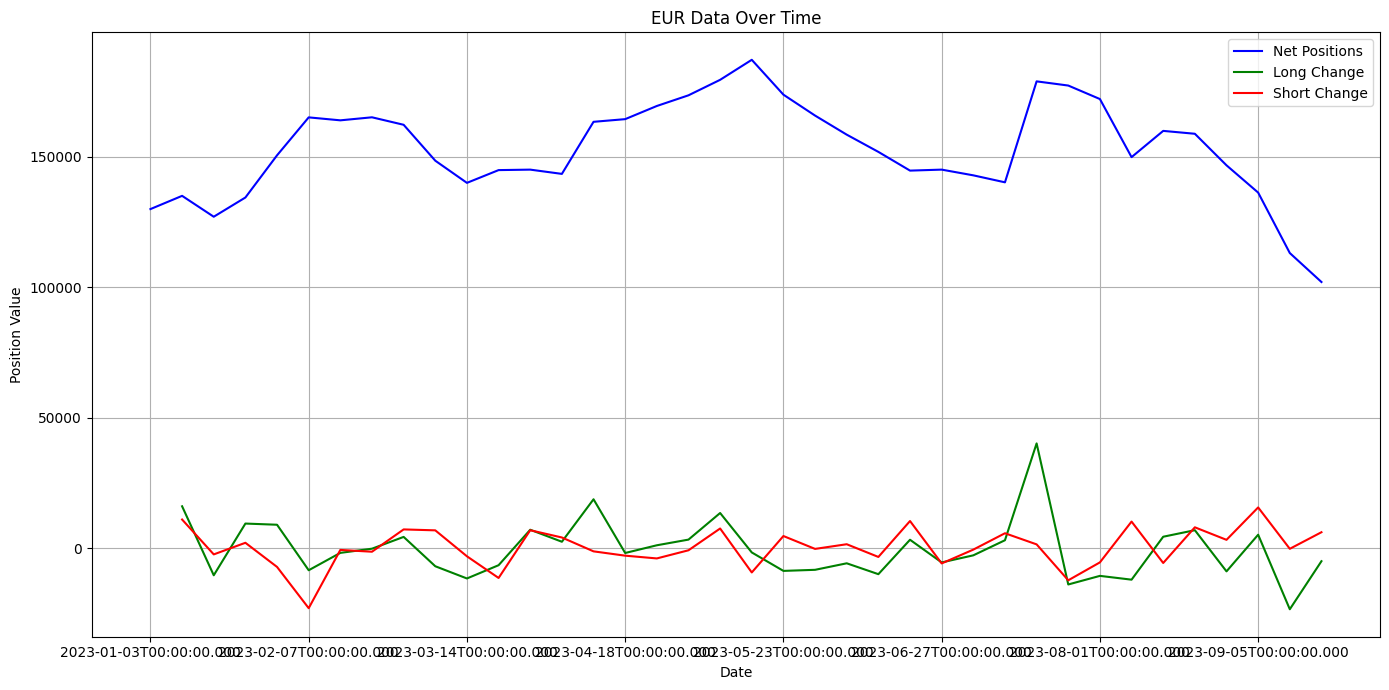

In [116]:
import matplotlib.pyplot as plt


plt.figure(figsize=(14, 7))

# 'net_positions' column
non_commercial_eur_data.plot(x='report_date_as_yyyy_mm_dd', y='net_positions', kind='line', label='Net Positions', color='blue', ax=plt.gca())

# long_change' column
non_commercial_eur_data.plot(x='report_date_as_yyyy_mm_dd', y='long_change', kind='line', label='Long Change', color='green', ax=plt.gca())

# 'short_change' column
non_commercial_eur_data.plot(x='report_date_as_yyyy_mm_dd', y='short_change', kind='line', label='Short Change', color='red', ax=plt.gca())

plt.title("EUR Data Over Time")
plt.ylabel("Position Value")
plt.xlabel("Date")
plt.grid(True)
plt.legend(loc="best")


plt.tight_layout()
plt.show()
